In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
from sklearn.datasets import load_iris

In [10]:
data = load_iris()

In [12]:
df = pd.DataFrame(data.data , columns = data.feature_names)

In [16]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [18]:
df['target'] = data.target

In [20]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [22]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [26]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train,y_test = train_test_split(x,y,test_size = 0.3 , random_state = 1)

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='entropy')

In [34]:
dtree

DecisionTreeClassifier(criterion='entropy')

In [38]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [40]:
y_pred = dtree.predict(x_test)

In [42]:
dtree.score(x_train,y_train)

1.0

In [44]:
dtree.score(x_test,y_test)

0.9555555555555556

In [46]:
from sklearn import tree

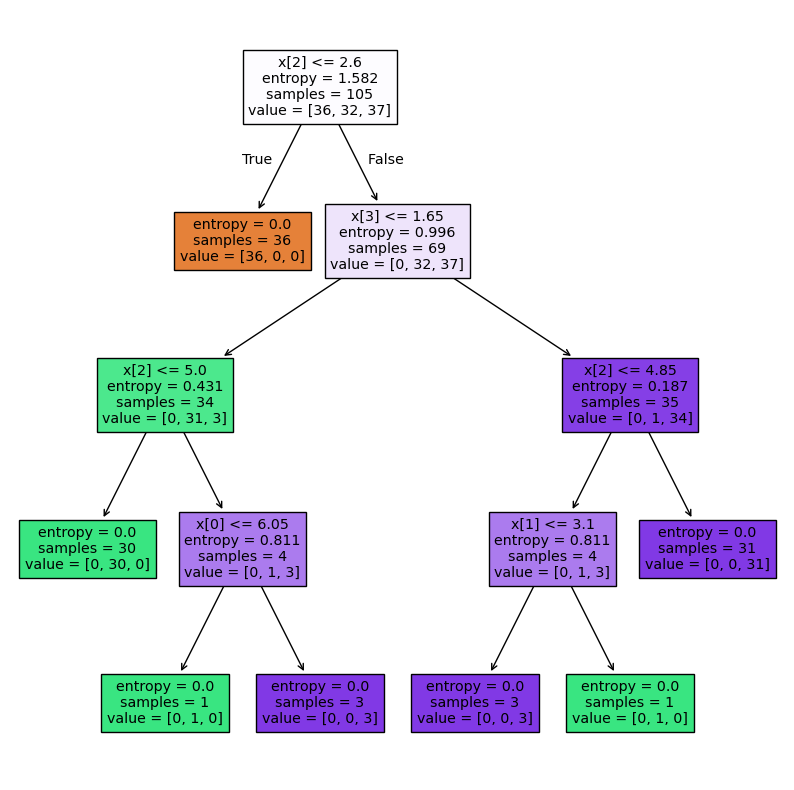

In [54]:
plt.figure(figsize = (10,10))
tree.plot_tree(dtree , filled = True)
plt.show()

In [62]:
from sklearn.metrics import accuracy_score
print(f'{accuracy_score(y_test,y_pred)*100:.2f}')

95.56


In [66]:
y_pred_train = dtree.predict(x_train)
print(f'{accuracy_score(y_train,y_pred_train)*100:.2f}')

100.00


In [68]:
# post purening

In [78]:
dtree_post = DecisionTreeClassifier(criterion='entropy',max_depth = 2)
dtree_post.fit(x_train,y_train)
y_pred_post = dtree_post.predict(x_test)
y_pred_post_train = dtree_post.predict(x_train)
print(f'{accuracy_score(y_train,y_pred_post_train)*100:.2f}')
print(f'{accuracy_score(y_test,y_pred_post)*100:.2f}')

96.19
95.56


In [80]:
#  prepurening using hyper parameter tuning 